In [2]:
from chainconsumer import ChainConsumer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Published DESY1 Chain

In [3]:
c = ChainConsumer()

In [4]:
names=['$\\Omega_m$','$\sigma_8$']

In [5]:
file = 's_l3.txt'

In [6]:
# TODO: change to not hardcode 96 for info length and last roews
chain_published = pd.read_table(file,skiprows=[row for row in range(637)],header=0,names=['omega_m','h0','omega_b','n_s','a_s','omnuh2','m1','m2','m3','m4','a','alpha','bias_1','bias_2','bias_3','bias_4','sigma8','post','weight'],delimiter='	')

In [7]:
ch = np.array([chain_published['omega_m'][0:5424],chain_published['sigma8'][0:5424]], dtype=float).T

In [8]:
w = np.array(chain_published['weight'].values[0:5424], dtype=float)

In [9]:
c.add_chain(ch,parameters=names,weights=w,name=r'\textbf{DES Y1 All}')

In [10]:
c.configure(plot_hists=False,sigma2d=False,kde=1.5, colors=["g", "r","b"], linewidths=1.2, 
	legend_kwargs={"loc": "upper right", "fontsize": 10},
	legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False)

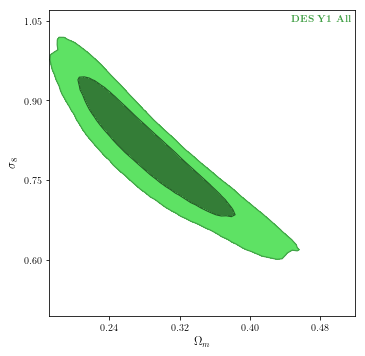

In [11]:
fig = c.plotter.plot(legend='t',figsize="column")

## Emcee Outputs

In [12]:
# TODO: change to not hardcode 96 for info length and last roews
chain = pd.read_table('emcee.txt',skiprows=[row for row in range(1,96)]+[20035,20036,20037,20038],header=0)

In [13]:
rename_cols = {}
for col in chain.columns[:-4]:
    rename_cols[col] = col.split('--')[1]
chain = chain.rename(columns = rename_cols)

In [14]:
# cut in half, remove burn-in 
startpoint = int(330382/2)

In [15]:
# can't sample in omega_m yet
chain['omega_m'] = chain['omega_c'] + chain['omega_b']

In [16]:
ch = np.array([chain['omega_m'][startpoint:],chain['sigma8'][startpoint:]], dtype=float).T

In [17]:
c.add_chain(ch,parameters=names,name=r'\textbf{FireCrown Emcee}')

In [18]:
c.configure(plot_hists=False,sigma2d=False,kde=1.5, colors=["g", "r","b"], linewidths=1.2, 
	legend_kwargs={"loc": "upper right", "fontsize": 10},
	legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False)

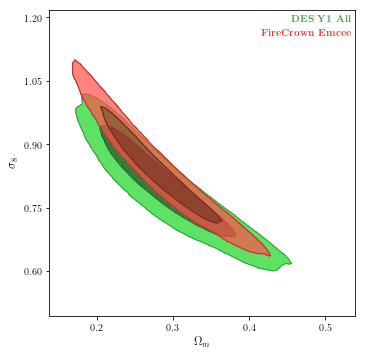

In [19]:
fig = c.plotter.plot(legend='t',figsize="column")

## Multinest Outputs

In [20]:
# TODO: change to not hardcode 96 for info length and last roews
chain = pd.read_table('multinest_chain.txt',skiprows=[row for row in range(1,105)]+[4424+105,4425+105,4426+105,4427+105,4428+105],header=0,dtype=float)

In [21]:
rename_cols = {}
for col in chain.columns[:-4]:
    rename_cols[col] = col.split('--')[1]
chain = chain.rename(columns = rename_cols)

Text(0.5, 1.0, 'Normalised posterior weight $p_i$')

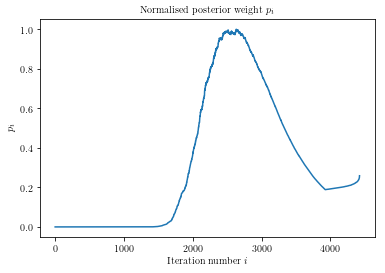

In [22]:
plt.xlabel("Iteration number $i$")
plt.ylabel(r"$p_i$")
chain['weight'][-500:] = np.sort(chain['weight'][-500:])
plt.plot(chain['weight']/chain['weight'].max())
#Add some helpful text, on the title and the plot itself
plt.title("Normalised posterior weight $p_i$", size='medium')
#plt.text(500, 0.4, "Increasing likelihood,\n volume still large", size="small")
#plt.text(5500,0.65, "Volume\ndecreasing", size='small')
#plt.text(6500, 0.12, "Final $n_\mathrm{live}$\npoints", size='small')

In [23]:
stop_point = 4424

In [24]:
# can't sample in omega_m yet
chain['omega_m'] = chain['omega_c'] + chain['omega_b']

In [25]:
ch = np.array([chain['omega_m'][0:stop_point],chain['sigma8'][0:stop_point]], dtype=float).T

In [26]:
w = np.array(chain['weight'][0:stop_point], dtype=float)

In [27]:
c.add_chain(ch,parameters=names,weights=w,name=r'\textbf{FireCrown Multinest}')

In [28]:
c.configure(plot_hists=False,sigma2d=False,kde=1.5, colors=["g", "r","b"], linewidths=1.2, 
	legend_kwargs={"loc": "upper right", "fontsize": 10},
	legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False)

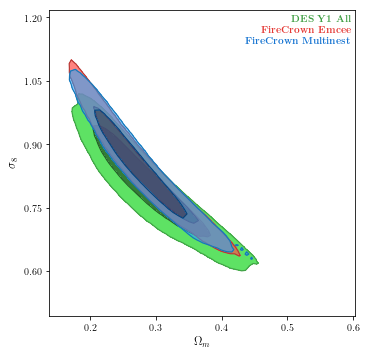

In [29]:
fig = c.plotter.plot(legend='t',figsize="column")